<a href="https://colab.research.google.com/github/jogong2718/AI_club/blob/main/1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data processing (OHE) and basic Neural Network: First Meeting

In [1]:
# libraries
# !pip install os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

After importing the libraries and tensorflow framework, we extract the mnist dataset from keras. The mnist dataset is a dataset of handdrawn numbers from zero to nine including labels that label each handdrawn image.

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


The first 10 labels of the dataset

In [4]:
for i in range(10):
  print(training_labels[i])

5
0
4
1
9
2
1
3
1
4


The first ten images in the dataset corresponding to the above labels

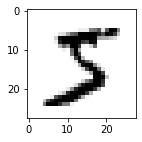

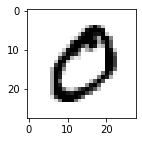

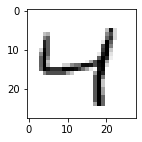

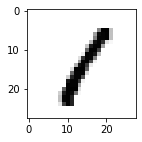

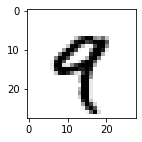

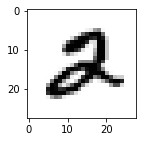

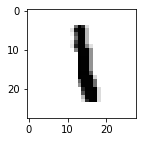

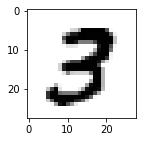

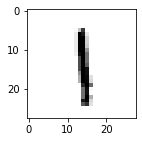

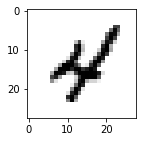

In [28]:

for i in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(training_images[i], cmap = "binary")
    plt.show()

<html>
<head>
    <h1 align="center"><b>One-Hot-Encode</b></h1>
</head>
<body>
    <font size = +0>One-Hot-Encoding is one of the most important data transformation techniques in machine learning. The idea behind this process is to help our Models understand the data better by converting our labels into binary sequences.
</body>

<body>

For example, the labels that we have seen above would be One-Hot-Encoded as follows: 

$$f([5, 0, 4, 1, 9, 2, 1, 3, 1, 4]) \\
= \\
[
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0], \\
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], \\
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0], \\
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0], \\
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1], \\
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], \\
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0], \\
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0], \\
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0], \\
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
]
$$
</body>
</html>



In [6]:
trainingLabelsohe = tf.keras.utils.to_categorical(training_labels)
testLabelsohe = tf.keras.utils.to_categorical(test_labels)

In [7]:
for i in range(10):
  print(trainingLabelsohe[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


<font size = +2> **TensorFlow**

One-Hot-Encoding is essentially data processing, which means it is essentially the preparation for the model. When bulding this model, we will first learn about Tensorflow.

Tensorflow is the software library that we will be using when we build our models and implement them in code.


In [11]:
n = 5
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(), 
tf.keras.layers.Dense(n),
tf.keras.layers.Dense(n),
tf.keras.layers.Dense(10, activation = "softmax")
])


Explain this DNN on the whiteboard

## Loss function, optimizer, and activation function: Second Meeting

In [12]:
with tf.device('/device:GPU:0'):
  model.compile(
      optimizer = "adam",
      loss = "categorical_crossentropy",
      metrics = ["accuracy"]
  )

In [15]:
history = model.fit(
    training_images, trainingLabelsohe, 
    validation_data = (test_images, testLabelsohe),
    epochs = 10,
    batch_size = 50
)

Epoch 1/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4634 - accuracy: 0.8640 - val_loss: 0.4562 - val_accuracy: 0.8690
Epoch 2/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4552 - accuracy: 0.8680 - val_loss: 0.4678 - val_accuracy: 0.8595
Epoch 3/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4546 - accuracy: 0.8672 - val_loss: 0.4518 - val_accuracy: 0.8751
Epoch 4/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4539 - accuracy: 0.8670 - val_loss: 0.4875 - val_accuracy: 0.8624
Epoch 5/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4502 - accuracy: 0.8693 - val_loss: 0.4688 - val_accuracy: 0.8734
Epoch 6/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4513 - accuracy: 0.8693 - val_loss: 0.4687 - val_accuracy: 0.8714
Epoch 7/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4504 - accuracy: 0.8692 - val_loss: 0.4455 - val_accuracy:

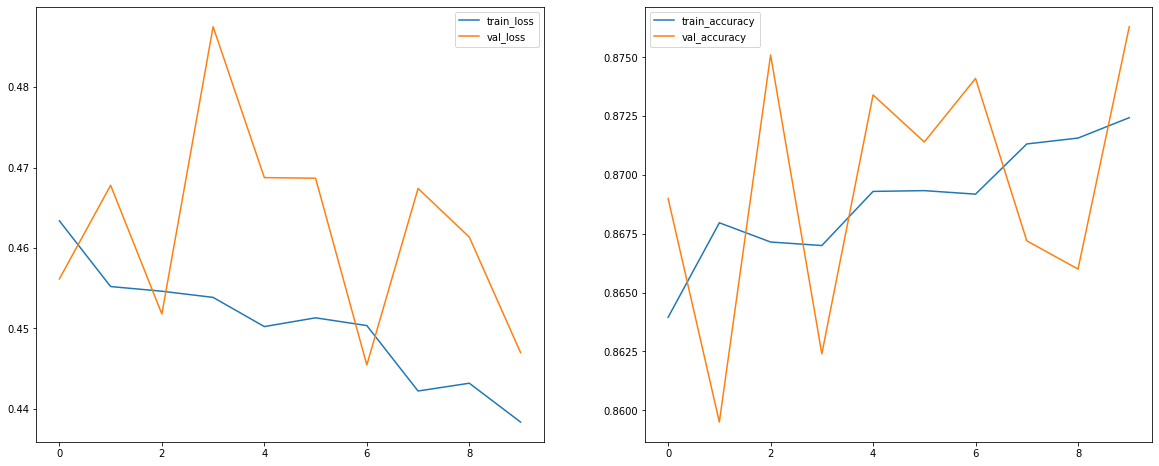

In [19]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss',])
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()